In [1]:
import cv2
import math
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15,10]

## Завантаження зображення

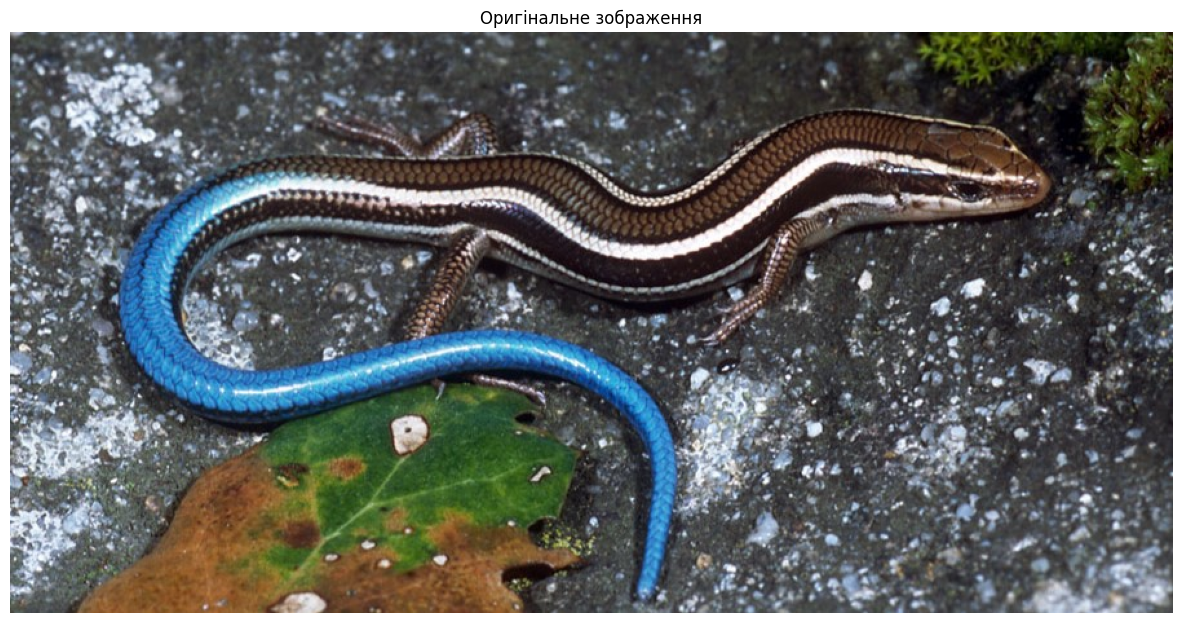

In [2]:
img = cv2.imread('../lab5_Verenchuk_Stanislav/data/blue-tail_skink.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#img_copy = img

plt.imshow(img)
plt.title('Оригінальне зображення')
plt.axis('off')
plt.show()

## Палітра кольорів

In [3]:
colors = np.array([
    [0,0,0],
    [64,64,64],
    [192,192,192],
    [255,255,255]
])

## Квантування зображення

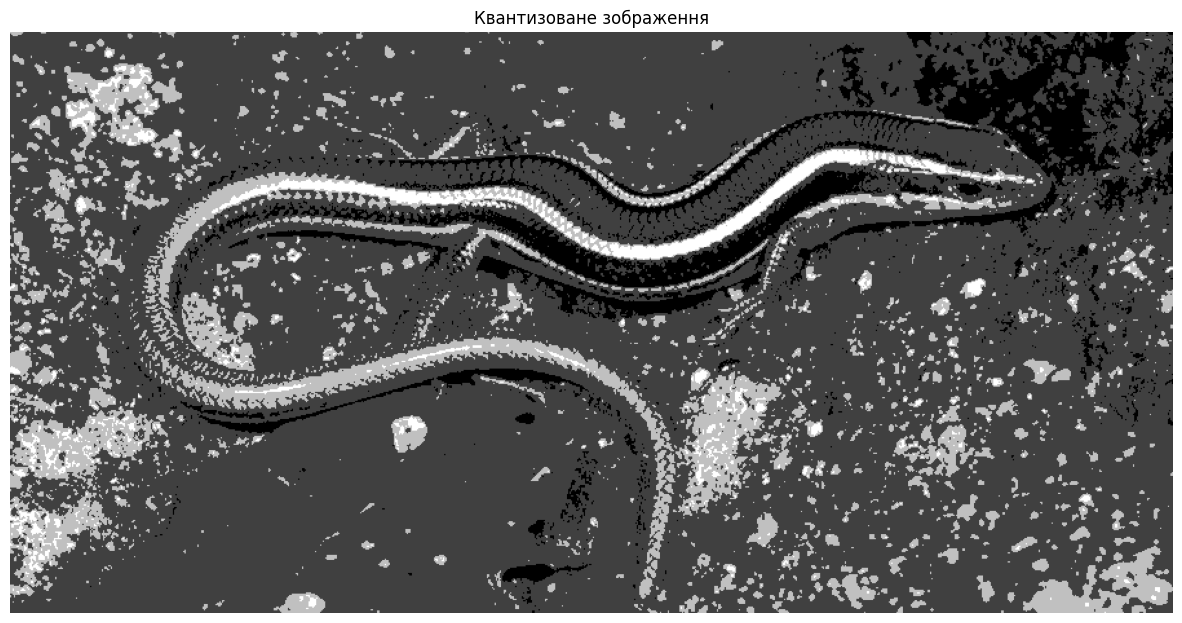

In [4]:
#img = img.astype(np.float32)

rows, cols, channels = img.shape
quantized = np.zeros_like(img)

for r in range(rows):
    for c in range(cols):
        pixel = img[r, c, :]
        # Обчислення відстаней до кожного кольору з палітри (Евклідовав відстань)
        distances = np.linalg.norm(colors - pixel, axis=1)
        closest_color = colors[np.argmin(distances)]
        quantized[r, c, :] = closest_color

# Відображення квантизованого зображення
plt.imshow(quantized)
plt.title('Квантизоване зображення')
plt.axis('off')
plt.show()

In [5]:
error = np.linalg.norm(img.astype(np.float32) - quantized.astype(np.float32), axis=2)
mean_quant_error = np.mean(error)
print("Середня помилка квантування: ", mean_quant_error)

Середня помилка квантування:  44.442894


## Дизеринг Флойда-Штейнберга

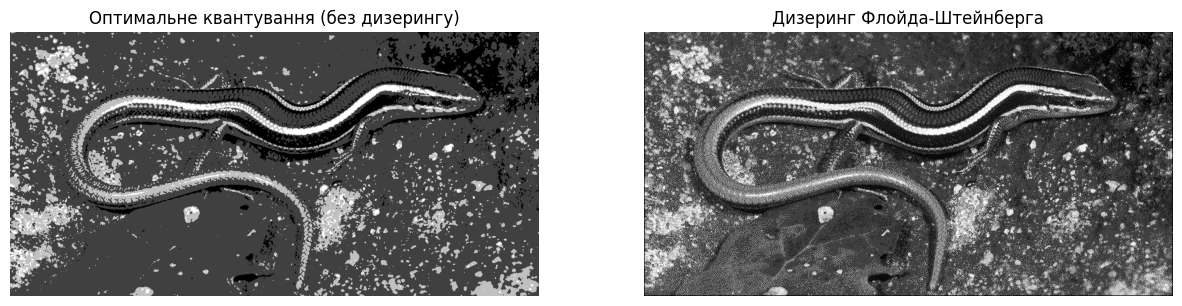

In [6]:
img_tmp = img.astype(np.float32)
dithering = np.zeros_like(img)

for r in range(rows - 1):
    for c in range(1, cols - 1):
        old_pixel = img_tmp[r, c, :]
        distances = np.linalg.norm(colors - old_pixel, axis=1)
        new_pixel = colors[np.argmin(distances)]

        dithering[r, c, :] = new_pixel

        quant_error = old_pixel - new_pixel

        # Розсіювання помилки
        img_tmp[r, c + 1, :] += quant_error * 7 / 16
        img_tmp[r + 1, c - 1, :] += quant_error * 3 / 16
        img_tmp[r + 1, c, :] += quant_error * 5 / 16
        img_tmp[r + 1, c + 1, :] += quant_error * 1 / 16

plt.subplot(1, 2, 1)
plt.imshow(quantized)
plt.title('Оптимальне квантування (без дизерингу)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.clip(dithering, 0, 255).astype(np.uint8))
plt.title('Дизеринг Флойда-Штейнберга')
plt.axis('off')
plt.show()

In [7]:
error_dithered = np.linalg.norm(img.astype(np.float32) - dithering.astype(np.float32), axis=2)
mean_quant_error_dithered = np.mean(error_dithered)
print("Середня помилка квантування з дизерингом: ", mean_quant_error_dithered)

Середня помилка квантування з дизерингом:  54.470966


# Додаткове завдання
## Застосування K-Mean кластеризації для підбору палітр 4, 16 та 32 кольори.

In [8]:
pixels = img.reshape(-1, 3)

df = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
df

R    G    B
0       156  155  160
1       169  168  174
2       180  180  188
3       180  182  194
4       183  184  202
...     ...  ...  ...
404995   75   79   80
404996   73   74   78
404997   71   72   76
404998   71   72   76
404999   72   73   77

[405000 rows x 3 columns]

In [9]:
def kmeans(color_clusters):
    clusters = KMeans(n_clusters=color_clusters, init='k-means++', random_state=42)
    return clusters

In [10]:
kmeans4 = kmeans(4)    # K-Means кластеризація для 4-х кольорів
kmeans16 = kmeans(16)  # K-Means кластеризація для 16-ти кольорів
kmeans32 = kmeans(32)  # K-Means кластеризація для 32-х кольорів

data4 = df
data16 = df
data32 = df

data4['cluster'] = kmeans4.fit_predict(data4[['R', 'G', 'B']])
data16['cluster'] = kmeans16.fit_predict(data16[['R', 'G', 'B']])
data32['cluster'] = kmeans32.fit_predict(data32[['R', 'G', 'B']])

In [11]:
#Центроїди кластерів

# для 4-х кольорів
centroids4 = kmeans4.cluster_centers_.astype(int)  # округлюємо до int для відображення
print('Отримані 4 кольори палітри (RGB):')
for i, center in enumerate(centroids4):
    print(f'Cluster {i + 1}: {center}')

print('-------------------------------------------')

# для 16-ти кольорів
centroids16 = kmeans16.cluster_centers_.astype(int)  # округлюємо до int для відображення
print('Отримані 16 кольорів палітри (RGB):')
for i, center in enumerate(centroids16):
    print(f'Cluster {i + 1}: {center}')

print('-------------------------------------------')

# для 32-х кольорів
centroids32 = kmeans32.cluster_centers_.astype(int)  # округлюємо до int для відображення
print('Отримані 32 кольори палітри (RGB):')
for i, center in enumerate(centroids32):
    print(f'Cluster {i + 1}: {center}')

Отримані 4 кольори палітри (RGB):
Cluster 1: [197 206 215]
Cluster 2: [84 83 75]
Cluster 3: [46 45 41]
Cluster 4: [108 133 154]
-------------------------------------------
Отримані 16 кольорів палітри (RGB):
Cluster 1: [230 234 240]
Cluster 2: [70 72 74]
Cluster 3: [ 72 163 213]
Cluster 4: [131 137 145]
Cluster 5: [25 18 18]
Cluster 6: [86 90 92]
Cluster 7: [100  72  44]
Cluster 8: [189 200 211]
Cluster 9: [45 40 37]
Cluster 10: [106 111 116]
Cluster 11: [ 34  78 131]
Cluster 12: [ 43 123 188]
Cluster 13: [58 89 36]
Cluster 14: [133 100  51]
Cluster 15: [57 56 57]
Cluster 16: [159 166 178]
-------------------------------------------
Отримані 32 кольори палітри (RGB):
Cluster 1: [240 242 246]
Cluster 2: [69 71 72]
Cluster 3: [133 142 153]
Cluster 4: [64 43 32]
Cluster 5: [90 94 98]
Cluster 6: [ 43 123 188]
Cluster 7: [33 24 23]
Cluster 8: [173 180 192]
Cluster 9: [103 119  49]
Cluster 10: [51 50 51]
Cluster 11: [50 59 14]
Cluster 12: [137 122 101]
Cluster 13: [ 61 154 210]
Cluster 14: [

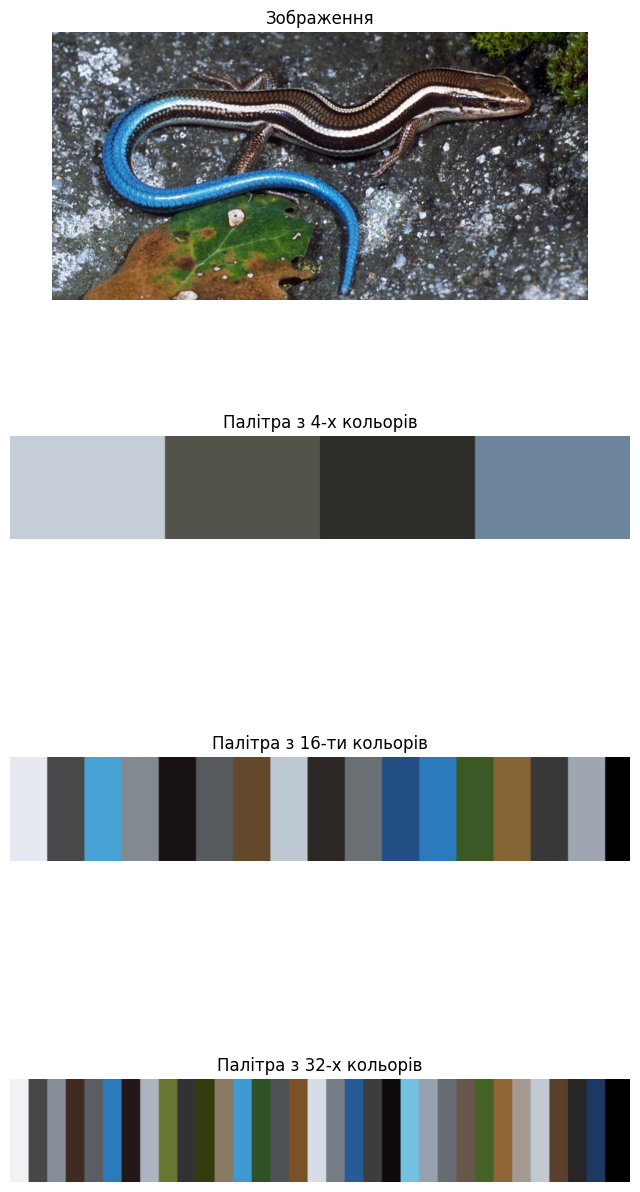

In [12]:
# Створення палітр кольорів

# для 4-х кольорів
palette4 = np.zeros((50, 300, 3), dtype='uint8')
steps4 = 300 // 4

for i, color in enumerate(centroids4):
    palette4[:, i*steps4:(i+1)*steps4, :] = color

# для 16-ти кольорів
palette16 = np.zeros((50, 300, 3), dtype='uint8')
steps16 = 300 // 16

for i, color in enumerate(centroids16):
    palette16[:, i*steps16:(i+1)*steps16, :] = color

# для 32-х кольорів
palette32 = np.zeros((50, 300, 3), dtype='uint8')
steps32 = 300 // 32

for i, color in enumerate(centroids32):
    palette32[:, i*steps32:(i+1)*steps32, :] = color

# Відображення палітр кольорів
plt.figure(figsize=(8, 16))
plt.subplot(4, 1, 1)
plt.imshow(img)
plt.title('Зображення')
plt.axis('off')

plt.subplot(4, 1, 2)
plt.imshow(palette4)
plt.title(f'Палітра з 4-х кольорів')
plt.axis('off')

plt.subplot(4, 1, 3)
plt.imshow(palette16)
plt.title(f'Палітра з 16-ти кольорів')
plt.axis('off')

plt.subplot(4, 1, 4)
plt.imshow(palette32)
plt.title(f'Палітра з 32-х кольорів')
plt.axis('off')
plt.show()

##  Використання палітр 4, 16 та 32 кольори для звичайного квантування та квантування з дизерингом.

In [13]:
# Функція для квантування зображення з заданою палітрою
def quantize_image(img, palette):
    rows, cols, _ = img.shape
    result = np.zeros_like(img)
    for r in range(rows):
        for c in range(cols):
            pixel = img[r, c, :]
            distances = np.linalg.norm(palette - pixel, axis=1)
            closest_color = palette[np.argmin(distances)]
            result[r, c, :] = closest_color
    return result

def floyd_steinberg_dithering(img, palette):
    img_tmp = img.astype(np.float32)
    rows, cols, _ = img.shape
    dithered = np.zeros_like(img)

    for r in range(rows -1):
        for c in range(1, cols - 1):
            old_pixel = img[r, c, :]
            distances = np.linalg.norm(palette - old_pixel, axis=1)
            new_pixel = palette[np.argmin(distances)]

            dithered[r, c, :] = new_pixel

            quant_error = old_pixel - new_pixel

            # Розсіювання помилки
            img_tmp[r, c + 1, :] += quant_error * 7 / 16
            img_tmp[r + 1, c - 1, :] += quant_error * 3 / 16
            img_tmp[r + 1, c, :] += quant_error * 5 / 16
            img_tmp[r + 1, c + 1, :] += quant_error * 1 / 16
            
    return np.clip(dithered, 0, 255).astype(np.uint8)

In [14]:
# Квантування
quantized_kmeans4 = quantize_image(img, centroids4)
quantized_kmeans16 = quantize_image(img, centroids16)
quantized_kmeans32 = quantize_image(img, centroids32)

# Квантування з дизерингом
dithered_kmeans4 = floyd_steinberg_dithering(img, centroids4)
dithered_kmeans16 = floyd_steinberg_dithering(img, centroids16)
dithered_kmeans32 = floyd_steinberg_dithering(img, centroids32)

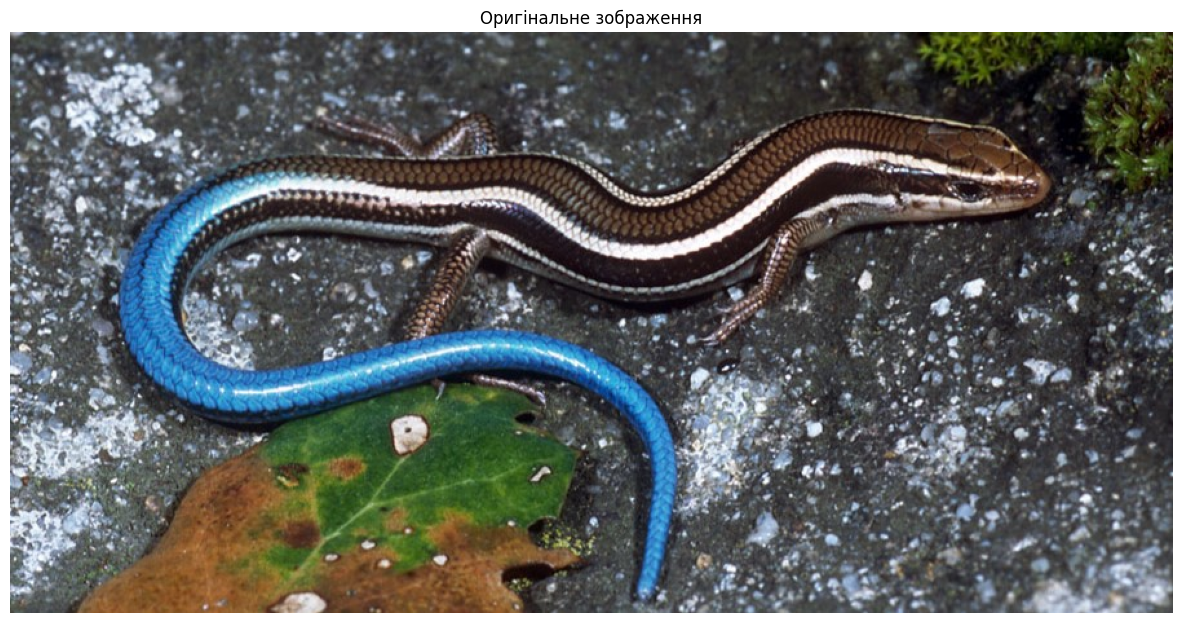

In [15]:
# Відображення
plt.imshow(img)
plt.title('Оригінальне зображення')
plt.axis('off')
plt.show()

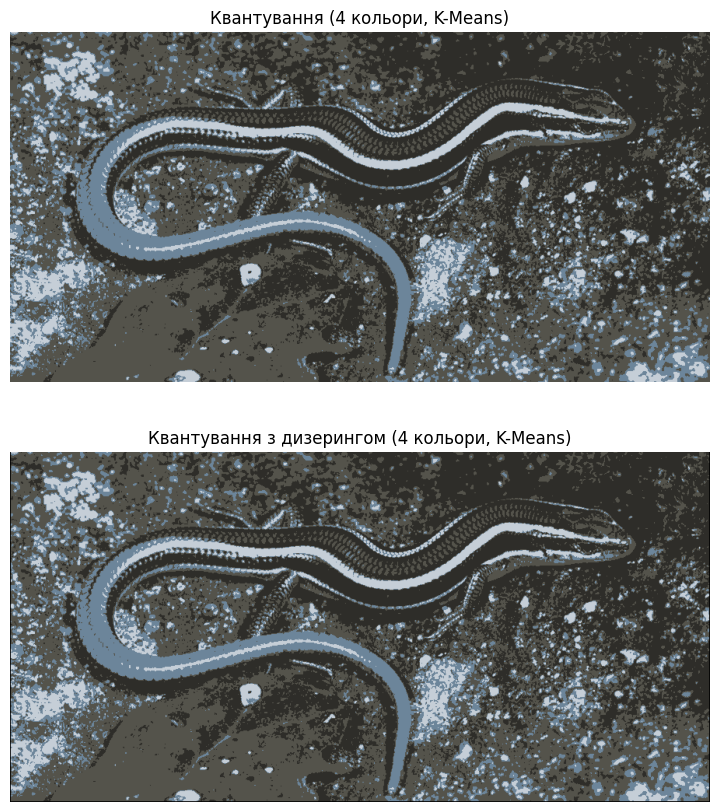

In [19]:
plt.subplot(2, 1, 1)
plt.imshow(quantized_kmeans4)
plt.title('Квантування (4 кольори, K-Means)')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(dithered_kmeans4)
plt.title('Квантування з дизерингом (4 кольори, K-Means)')
plt.axis('off')
plt.show()

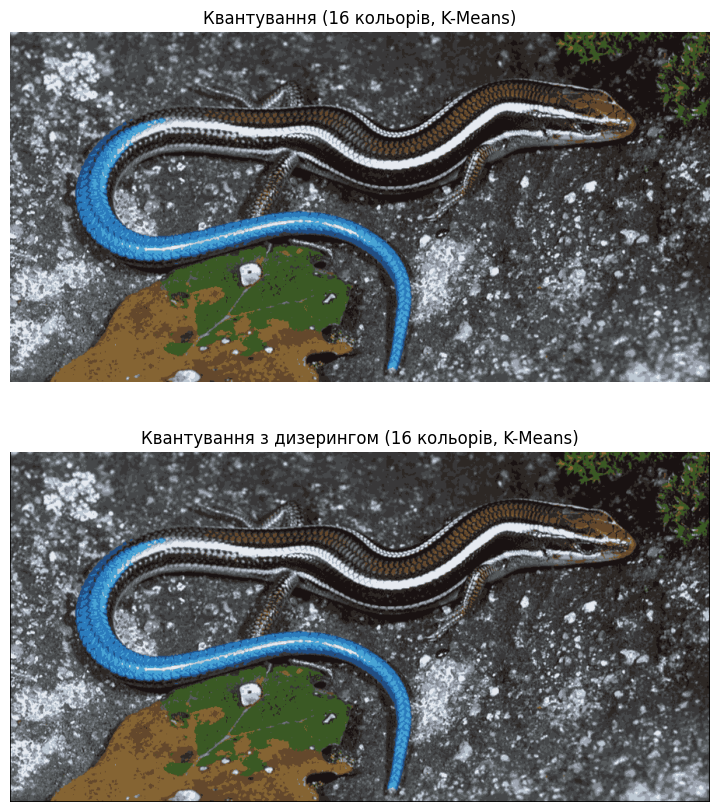

In [20]:
plt.subplot(2, 1, 1)
plt.imshow(quantized_kmeans16)
plt.title('Квантування (16 кольорів, K-Means)')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(dithered_kmeans16)
plt.title('Квантування з дизерингом (16 кольорів, K-Means)')
plt.axis('off')
plt.show()

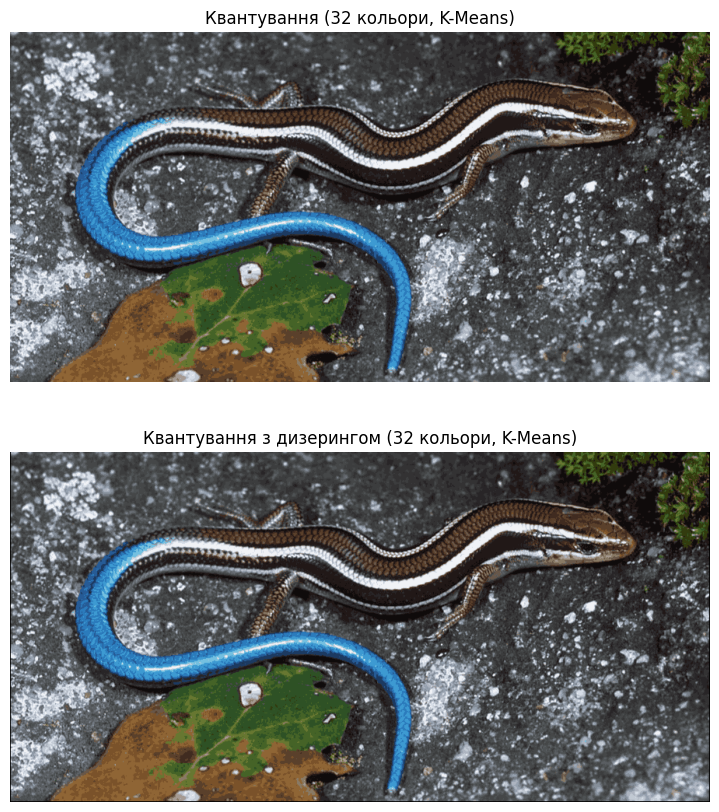

In [21]:
plt.subplot(2, 1, 1)
plt.imshow(quantized_kmeans32)
plt.title('Квантування (32 кольори, K-Means)')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(dithered_kmeans32)
plt.title('Квантування з дизерингом (32 кольори, K-Means)')
plt.axis('off')
plt.show()

In [22]:
# Обчислення середньої помилки
def compute_quantization_error(original, quantized):
    error = np.linalg.norm(original.astype(np.float32) - quantized.astype(np.float32), axis=2)
    return np.mean(error)

In [23]:
error_q4 = compute_quantization_error(img, quantized_kmeans4)
error_q16 = compute_quantization_error(img, quantized_kmeans16)
error_q32 = compute_quantization_error(img, quantized_kmeans32)

error_d4 = compute_quantization_error(img, dithered_kmeans4)
error_d16 = compute_quantization_error(img, dithered_kmeans16)
error_d32 = compute_quantization_error(img, dithered_kmeans32)

print("Середня помилка квантування (звичайне):")
print(f"  4 кольори:  {error_q4:.2f}")
print(f" 16 кольорів: {error_q16:.2f}")
print(f" 32 кольори:  {error_q32:.2f}")

print("\nСередня помилка квантування з дизерингом:")
print(f"  4 кольори:  {error_d4:.2f}")
print(f" 16 кольорів: {error_d16:.2f}")
print(f" 32 кольори:  {error_d32:.2f}")

Середня помилка квантування (звичайне):
  4 кольори:  31.84
 16 кольорів: 14.45
 32 кольори:  10.66

Середня помилка квантування з дизерингом:
  4 кольори:  32.41
 16 кольорів: 15.11
 32 кольори:  11.33


# Відповіді на запитання та висновки

## 1. Яке зображення має більшу помилку квантування: оптимально квантоване чи після дизерингу?
Для відтінків сірого:
- Середня помилка квантування (звичайне):  44.442894
- Середня помилка квантування з дизерингом:  54.470966

Палітра на 4 кольори:
- Середня помилка квантування (звичайне):  31.84
- Середня помилка квантування з дизерингом:  32.41

Палітра на 16 кольори:
- Середня помилка квантування (звичайне):  14.45
- Середня помилка квантування з дизерингом:  15.11

Палітра на 32 кольори:
- Середня помилка квантування (звичайне):  10.66
- Середня помилка квантування з дизерингом:  11.33

Зображення з дизерингом має трохи більшу помилку. Це пов’язано з тим, що дизеринг "навмисно" змінює деякі пікселі, щоб розсіяти помилку візуально, а не мінімізувати помилку на рівні піксель-до-пікселя.

## 2. Яке зображення виглядає краще?
Зображення з дизерингом виглядає краще для людини, особливо коли кількість кольорів обмежена. Дизеринг зменшує ефект "смуг" (color banding) і створює ілюзію більш плавних переходів — навіть якщо палітра дуже обмежена.
У ході лабораторної це найкраще видно на самому початку, при використанні палітри відтінків сірого.

## 3. Чи можна повторити процес з 2 кольорами (чорний і білий)?